In [117]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F # gives us access to many functions
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

import scipy.stats as stats #t-test

#sympy (symbolic math in python)
import sympy as sym
import sympy.plotting.plot as symplot

from IPython.display import display
display.set_matplotlib_formats('svg') #improves figure formats (draws figures in vector format instead of pixel)

In [ ]:
# Vector and matrix transpose
# syntax is same in numpy and pytorch (i.e. m.T gives us the transpose in both numpy and pytorch)
import numpy as np
import torch

m = np.array([[1,2,3],[4,5,6]])
print(m)
print("shape",m.shape,"\n")

print(m.T)
#np.transpose(m) #another way to transpose in numpy

print("shape",m.T.shape,"\n")
print(m,"\n") ## transpose does not change original matrix

t = torch.tensor([[1,2,3],[4,5,6]])
print(t)
print("shape",t.shape,"\n")

print(t.T)
print("shape",t.T.shape,"\n")


[[1 2 3]
 [4 5 6]]
shape (2, 3) 

[[1 4]
 [2 5]
 [3 6]]
shape (3, 2) 

[[1 2 3]
 [4 5 6]] 

tensor([[1, 2, 3],
        [4, 5, 6]])
shape torch.Size([2, 3]) 

tensor([[1, 4],
        [2, 5],
        [3, 6]])
shape torch.Size([3, 2]) 



In [ ]:
# Dot product / Vector dot product / Inner product
# a.b = <a,b> = aTb
# output of a dot product is a single scalar value obtained after elemetwise multiplication
#  this number reflects commonalities between 2 vectors (correlation is derived from dot product) ; orthogonal projection etc.

a = np.array([1,2,3])
b = np.array([4,5,6])

print("numpy dot product method 1 :",a.dot(b))
print("numpy dot product method 2 :",np.dot(a,b))
print("numpy dot product method 3 :",np.sum(a*b))

a_pt = torch.tensor(a)
b_pt = torch.tensor(b)
print("pytorch dot product method 1  :",a_pt.dot(b_pt))
print("pytorch dot product method 2 :",torch.dot(a_pt,b_pt))
print("pytorch dot product method 3 :",torch.sum(a_pt*b_pt))

numpy dot product method 1 : 32
numpy dot product method 2 : 32
numpy dot product method 3 : 32
pytorch dot product method 1  : tensor(32)
pytorch dot product method 2 : tensor(32)
pytorch dot product method 3 : tensor(32)


In [ ]:
#Matrix multiplication
#numpy
m1 = np.array([[1,2,3],[4,5,6]])
m2 = np.array([[1,2],[3,4],[5,6]])
A = np.random.randn(4,3)
B = np.random.randn(3,4)

m3 = np.matmul(m1,m2)
m4 = m1@m2 #@ is shorthand for matmul
print(m3)
print(m4)
print(np.round(A@B,2))

#pytorch
m1 = torch.tensor(m1)
m2 = torch.tensor(m2)
A = torch.randn(4,3)
B = torch.randn(3,4)
m3 = torch.matmul(m1,m2)
m4 = m1@m2
print(m3)
print(m4)

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]
[[ 0.92 -0.37  1.61  0.18]
 [ 0.08 -0.85 -1.4   0.81]
 [ 1.93 -0.22 -2.1   1.52]
 [-0.03  0.93  0.29 -0.54]]
tensor([[22, 28],
        [49, 64]])
tensor([[22, 28],
        [49, 64]])


[-2.15384435 -2.17464635 -0.13909165]
[0.10550431 0.10333228 0.79116341]
[ 0 -1 -3  7 -4  0  3 10 14 -1  3  2  8  9  2 -3  0 -3 11  6 14 -4 13 -3
 -2]
[3.39885680e-07 1.25036954e-07 1.69219116e-08 3.72729907e-04
 6.22522338e-09 3.39885680e-07 6.82678638e-06 7.48648031e-03
 4.08747975e-01 1.25036954e-07 6.82678638e-06 2.51143436e-06
 1.01318493e-03 2.75412219e-03 2.51143436e-06 1.69219116e-08
 3.39885680e-07 1.69219116e-08 2.03503634e-02 1.37119670e-04
 4.08747975e-01 6.22522338e-09 1.50369977e-01 1.69219116e-08
 4.59985248e-08]
0.9999999999999999


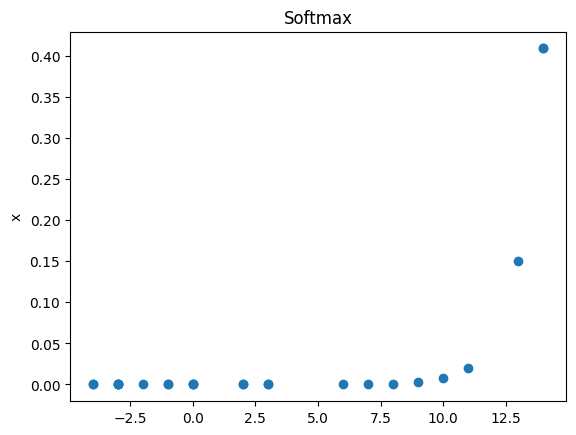

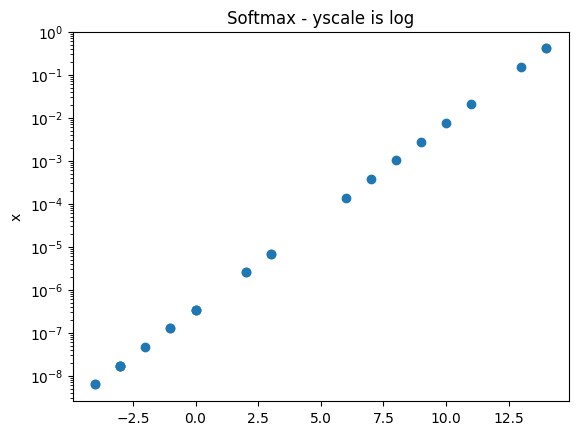

In [ ]:
# Softmax
# used to generate probabilities because the output of softmax function are between 0 and 1 + their sum totals 1

def soft_max(x):
  e =  np.exp(x)
  total = sum(e)
  return (e/total)

x = np.random.randn(3)
print(x)
print(soft_max(x))

## Output datasets
z = [1,2,3]
z = np.random.randint(-5,high = 15,size = 25)

sigma = soft_max(z)
print(z)
print(sigma)
print(sum(sigma)) #sum is always equal to 1

## Visuals
plt.scatter(z,sigma)
plt.ylabel("sigma")
plt.ylabel("x")
plt.title("Softmax")
plt.show()

#softmax function is a linear transformation in log scale
plt.scatter(z,sigma)
plt.ylabel("sigma")
plt.ylabel("x")
plt.title("Softmax - yscale is log")
plt.yscale('log')
plt.show()

In [ ]:
##Softmax in pytorch

#create an instance of softmax activation class
softfun = nn.Softmax(dim=0)

#apply data to that function
z = [1,2,3]
sigmaT = softfun(torch.Tensor(z))

#results
print(sigmaT)
print(soft_max(z))


tensor([0.0900, 0.2447, 0.6652])
[0.09003057 0.24472847 0.66524096]


x 
: [0.1        0.31111111 0.52222222 0.73333333 0.94444444 1.15555556
 1.36666667 1.57777778 1.78888889 2.        ]
log x 
: [-2.30258509 -1.16760516 -0.64966207 -0.31015493 -0.05715841  0.14458123
  0.31237469  0.45601739  0.58159469  0.69314718]
exp x 
: [1.10517092 1.36494087 1.68576965 2.08200908 2.57138443 3.17578725
 3.9222547  4.844179   5.98280122 7.3890561 ]


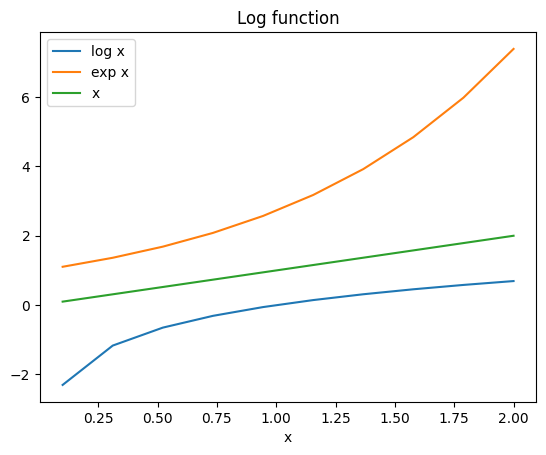

In [ ]:
# Log function/ transformation
# natural log is the inverse of the natural exponent
# log x is a monotonic function of x i.e. minimizing x is the same as minimizing log x
# log is a non linear function
# log x is only defined for values of x > 0
# log x stretches out the small values of x. Hence it better distinguishes small values

x = np.linspace(0.1,2,10) #linearly spaced numbers
print("x \n:",x)

y = np.log(x)
print("log x \n:",y)

z = np.exp(x)
print("exp x \n:",z)

plt.plot(x,y,label ="log x")
plt.plot(x,z,label ="exp x")
plt.plot(x,x,label ="x")
plt.xlabel("x")
plt.legend()
plt.title("Log function")
plt.show()

[0.01818182 0.03636364 0.05454545 0.07272727 0.09090909 0.10909091
 0.12727273 0.14545455 0.16363636 0.18181818]
[-4.00733319 -3.314186   -2.9087209  -2.62103882 -2.39789527 -2.21557372
 -2.06142304 -1.92789164 -1.81010861 -1.70474809]
[0.0728606  0.12051585 0.1586575  0.19062101 0.21799048 0.24169895
 0.26236293 0.2804206  0.29619959 0.3099542 ]


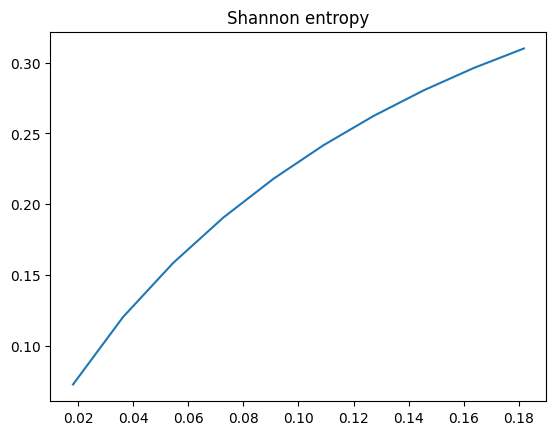

In [ ]:
# Entropy and cross entropy
# Shannon entropy is a measure of uncertainty
x = np.linspace(0.1,1,10)
x = x/x.sum()
y = np.log(x)

entropy = -x*y #shannon entropy
print(x)
print(y)
print(entropy)

plt.plot(x,entropy)
plt.title("Shannon entropy")
plt.show()

#interpretation of entropy
# high entropy - more uncertain
# low entropy - less uncertain, most values repeat itself

#entropy vs variance - entropy is non linear and makes no assumptions about the distribution
#variance on the other hand depends on the validity of the mean and is therefore appropriate for roughly normal data


In [ ]:
#cross entropy
p = np.linspace(0.1,1,10)
q = np.linspace(0.01,1,10)
print(p)
print(q)

ln_q = np.log(q)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


In [ ]:
## Entropy using pytorch
p = np.linspace(0.1,1,10)
q = np.linspace(0.01,1,10)

p = p/p.sum()
q = q/q.sum()

p_tensor = torch.tensor(p)
q_tensor = torch.tensor(q)

print(F.binary_cross_entropy(p_tensor,q_tensor))
print(F.binary_cross_entropy(q_tensor,p_tensor))

tensor(0.3010, dtype=torch.float64)
tensor(0.3115, dtype=torch.float64)


In [ ]:
#min/max ; argmin/argmax
x = [-2,1,2,3,4,5,22,0,-1]
print("min :",min(x))
print("argmin :",np.argmin(x)) #gives index of min value of x
print("max :",max(x))
print("argmax :",np.argmax(x)) #gives index of max value of x


print("min value using argmin as index :",x[np.argmin(x)])

min : -2
argmin : 0
max : 22
argmax : 6
min value using argmin as index : -2


In [ ]:
#using matrices
m = np.array([[1,2,3],[0,9,8]])

print("min of entire matrix",m.min())
print("min of entire matrix",np.min(m))

print("max of entire matrix",m.max())
print("max of entire matrix",np.max(m))

print("min of each column",m.min(axis=0))
print("min of each column",np.min(m,axis=0))

print("max of each column",m.max(axis=0))
print("max of each column",np.max(m,axis=0))

print("min of each row",m.min(axis=1))
print("min of each row",np.min(m,axis=1))

print("max of each row",m.max(axis=1))
print("max of each row",np.max(m,axis=1))

print(m)
print("argmin of entire matrix",m.argmin()) #linear index 3 (note)
print("argmin of each column",m.argmin(axis=0))
print("argmin of each row",m.argmin(axis=1))

min of entire matrix 0
min of entire matrix 0
max of entire matrix 9
max of entire matrix 9
min of each column [0 2 3]
min of each column [0 2 3]
max of each column [1 9 8]
max of each column [1 9 8]
min of each row [1 0]
min of each row [1 0]
max of each row [3 9]
max of each row [3 9]


In [ ]:
#using pytorch
m = torch.tensor(m)

print(m)
#print("min of entire matrix",torch.min(m))
#print("min of each column",torch.min(m,axis=0))
print("min of each row",torch.min(m,axis=1))

#Note - pytorch provides argmin automatically in its outputs
n = torch.min(m,axis=1)
print(type(n))
print()

print("values:",n.values)
print()
print("indices:",n.indices)


tensor([[1, 2, 3],
        [0, 9, 8]])
min of each row torch.return_types.min(
values=tensor([1, 0]),
indices=tensor([0, 0]))
<class 'torch.return_types.min'>

values: tensor([1, 0])

indices: tensor([0, 0])


In [ ]:
#Mean and variance
#measures of central tendencies i.e. one number or value to represent concentration of data in a distribution
#Mean may not be the most indicative for non normal distributions
#variance is a measure of dispersion and is suitable for any distribution
# variance vs mean absolute deviation(MAD) - variance is better for optimization because it emphasizes larger values
#L1 regularization equivalent to MAD
#L2 regularization equivalent to variance
#standard deviation is square root of variance

x = np.array([1,2,3,4,5])
n = len(x)
mean1 = sum(x)/n
print("mean is:",mean1)

print("unbiased variance: ",np.var(x,ddof=1)) #ddof = degrees of freadom
print("calculated: ",(1/(n-1))*(sum((x-mean1)**2))) #important to convert x into a numpy array for such operations (unbiased variance)

print("Biased variance: ",np.var(x,ddof=0)) #default value of ddof
print("calculated: ",(1/(n))*(sum((x-mean1)**2))) #ddof = 0 is equivalent to a denominator of n (biased variance)

#For most use cases we use the unbiased estimate of variance. Note that as n gets larger, the difference in biased and unbiased variances becomes smaller and smaller

mean is: 3.0
unbiased variance:  2.5
calculated:  2.5
Biased variance:  2.0
calculated:  2.0


In [ ]:
# Random samples and sampling variability
# sampling variability - single measurement will vary with each sample (caused by natural variation, measurement noise etc.)
# Solution is to take as many samples as possible. (Law of large numbers)
# law of large numbers - the more samples we take the better we will get at estimating the underlying population
# random sampling is key (non-random or non-representative sampling can cause systemic bias, lack of generalization, overfitting etc.)

x = [1,2,3,4,5,6,7,8,7,6,5,4,3,2]
popmean = np.mean(x)

sample = np.random.choice(x,size=5,replace=True)
samplemean = np.mean(sample)

print("population mean :",popmean)
print("sample mean without multiple samples :",samplemean)

total = 0
sample_list =[]
for i in range(100):
  sample = np.random.choice(x,size=5,replace=True)
  total += np.mean(sample)
  sample_list.append(np.mean(sample))

samplemean_avg = total/100
print("sample mean with multiple samples :",samplemean_avg)
(popmean - samplemean_avg)/popmean



population mean : 4.5
sample mean without multiple samples : 5.4
sample mean with multiple samples : 4.662000000000001


np.float64(-0.03600000000000018)

In [ ]:
#global seeding

np.random.seed(1)
print(np.random.randn(5))
print(np.random.randn(5))
print(np.random.randn(5))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
[ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]


In [ ]:
#local seeding
randseed1 = np.random.RandomState(1)
randseed2 = np.random.RandomState(2)

print(randseed1.randn(5))
print(randseed2.randn(5))
print(randseed1.randn(5))
print(randseed2.randn(5))
print(np.random.randn(5))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559]
[-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
[-0.84174737  0.50288142 -1.24528809 -1.05795222 -0.90900761]
[0.58662319 0.83898341 0.93110208 0.28558733 0.88514116]


In [ ]:
#seeding in pytorch
torch.manual_seed(1)
print(torch.randn(5))
print(torch.randn(5))


tensor([ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519])
tensor([-0.1661, -1.5228,  0.3817, -1.0276, -0.5631])


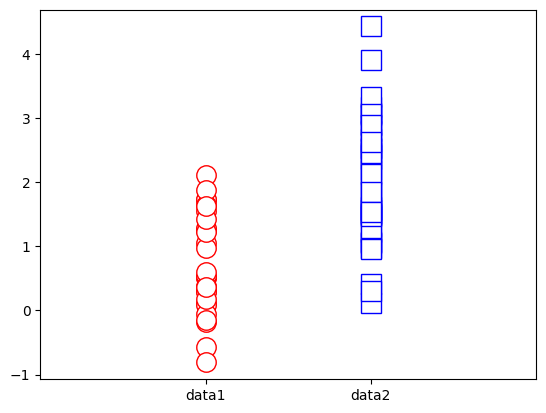

t-value : -6.001195293532448
p-value : 8.462493561126174e-08


In [ ]:
#t-test
#Null hypothesis = 2 models perform equally well (we want the t-test to provide evidence against null hypothesis)
# t-value = difference of means / standard deviation =  (x_mean -y_mean)/ (s/sqrt(n)) ; n = number of times we rerun the model, s = std dev. ; t-value is calculated using scipy
n1 = 30 # samples in dataset 1
n2 = 40 #samples in dataset 2
mu1 = 1 # population mean in dataset1
mu2 = 2 # population mean in dataset2

data1 = mu1 +np.random.randn(n1)
data2 = mu2 +np.random.randn(n2)

plt.plot(np.zeros(n1),data1,"ro",markerfacecolor = 'w',markersize = 14)
plt.plot(np.ones(n2),data2,"bs",markerfacecolor = 'w',markersize = 14)
plt.xlim([-1,+2])
plt.xticks([0,1],labels =["data1","data2"])
plt.show()

#is the difference between the means of data1 and data2  statistically significant

#_ind = independent samples
t,p = stats.ttest_ind(data1,data2)
print("t-value :",t)
print("p-value :",p)

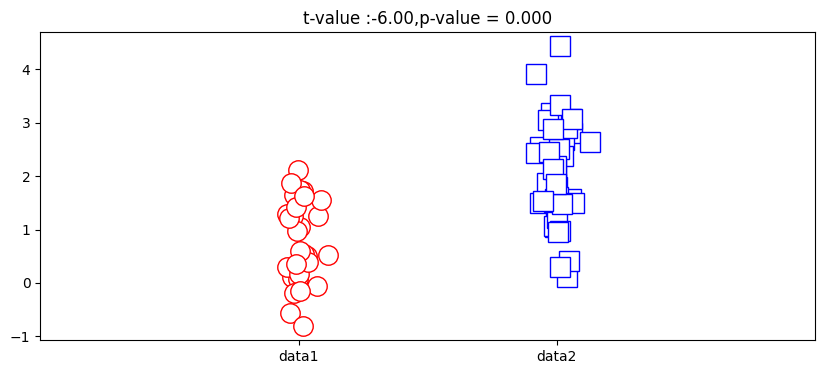

In [ ]:
#another way to visualize t-test results
fig = plt.figure(figsize = (10,4))
plt.rcParams.update({'font.size':10})

#x-axis offsets to improve visualization
plt.plot(0+np.random.randn(n1)/25,data1,"ro",markerfacecolor = 'w',markersize = 14)
plt.plot(1+np.random.randn(n2)/25,data2,"bs",markerfacecolor = 'w',markersize = 14)

plt.xlim([-1,+2])
plt.xticks([0,1],labels =["data1","data2"])

plt.title(f"t-value :{t:.2f},p-value = {p:.3f}")
plt.show()

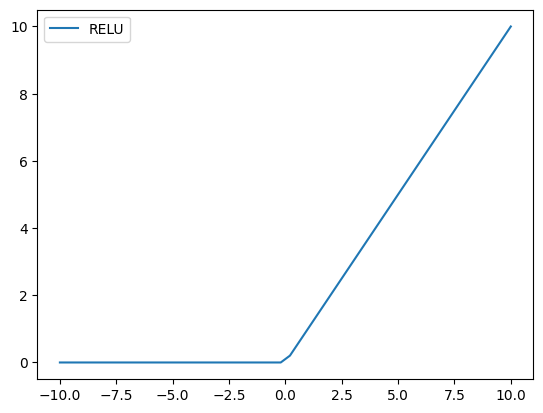

In [ ]:
# Derivatives primer
def relu(x):
  y = []
  for i in range(len(x)):
    if x[i]<0:
      y.append(0)
    else:
      y.append(x[i])
  return y

x = np.linspace(-10,10,50)
y = relu(x)
plt.plot(x,y,label = "RELU")
plt.legend()
plt.show()

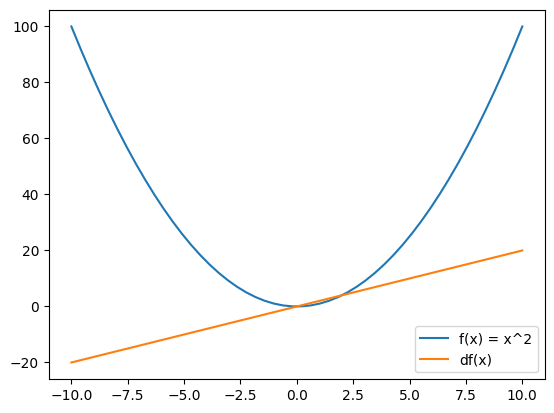

In [ ]:
def squared(x):
  return x**2

def d_squared(x):
  return 2*x

x = np.linspace(-10,10,50)
y = squared(x)
dy = d_squared(x)
plt.plot(x,y,label = "f(x) = x^2")
plt.plot(x,dy,label = "df(x)")
plt.legend()
plt.show()

4*x


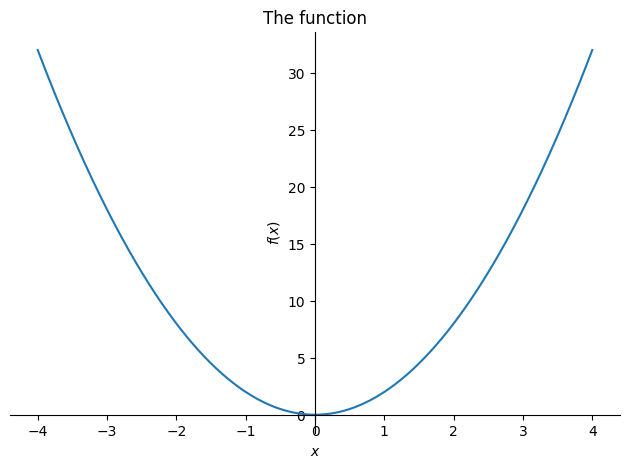

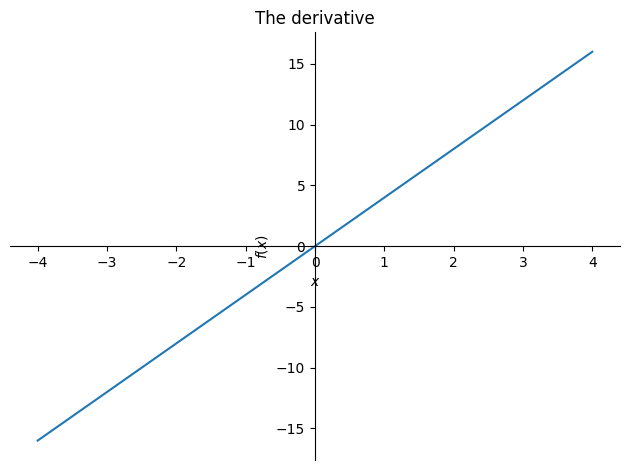

In [ ]:
 x = sym.symbols('x')
 fx = 2*x**2 #function
 df = sym.diff(fx,x) #discrete derivative
 print(df)

#plotting
symplot(fx,(x,-4,4),title = 'The function')
plt.show()

symplot(df,(x,-4,4),title = 'The derivative')
plt.show()

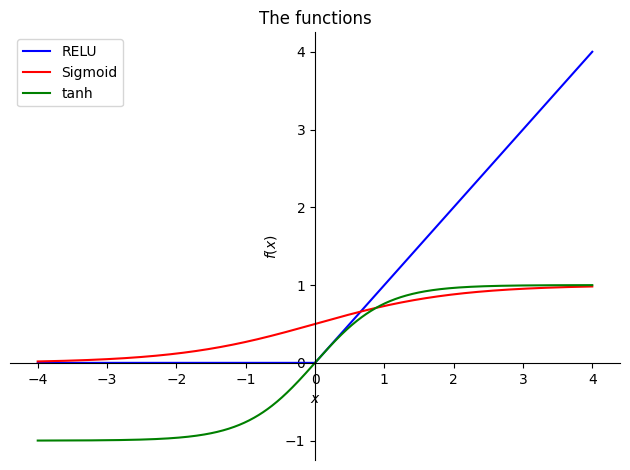

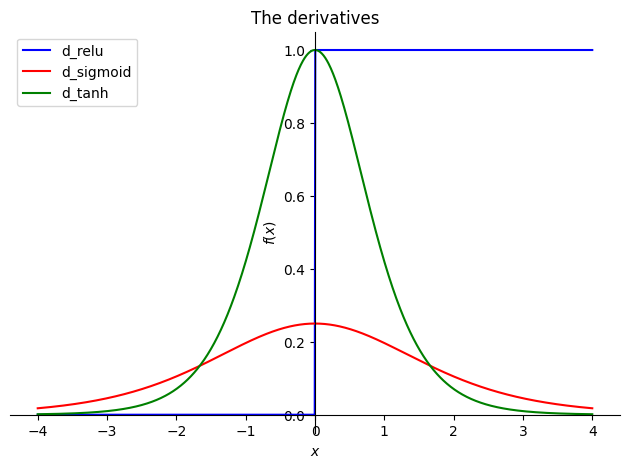

In [ ]:
 x = sym.symbols('x')

 #RELU activation function
 relu = sym.Max(0,x)  #function
 d_relu = sym.diff(relu,x) #discrete derivative

 #Sigmoid activation function
 sigmoid = 1/(1+sym.exp(-x))
 d_sigmoid = sym.diff(sigmoid,x)

 #tanh activation function
 tanh = sym.tanh(x)
 d_tanh = sym.diff(tanh,x)

#plotting functions
p = symplot(relu,(x,-4,4),label = 'RELU',show = False,line_color = 'blue')
p.extend(symplot(sigmoid,(x,-4,4),label = 'Sigmoid',show = False,line_color = 'red'))
p.extend(symplot(tanh,(x,-4,4),label = 'tanh',show = False,line_color = 'green'))
p.legend = True
p.title = 'The functions'
p.show()

#plotting derivatives
p = symplot(d_relu,(x,-4,4),label = 'd_relu',show = False,line_color = 'blue')
p.extend(symplot(d_sigmoid,(x,-4,4),label = 'd_sigmoid',show = False,line_color = 'red'))
p.extend(symplot(d_tanh,(x,-4,4),label = 'd_tanh',show = False,line_color = 'green'))
p.legend = True
p.title = 'The derivatives'
p.show()

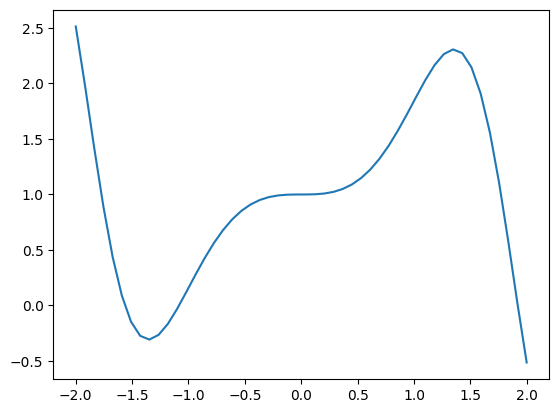

In [ ]:
#derivatives to find local minima / maxima (critical points)
x = np.linspace(-2, 2, 50) # Define x using numpy.linspace
fx = x*np.sin(x**2) +1
plt.plot(x,fx)
plt.show()

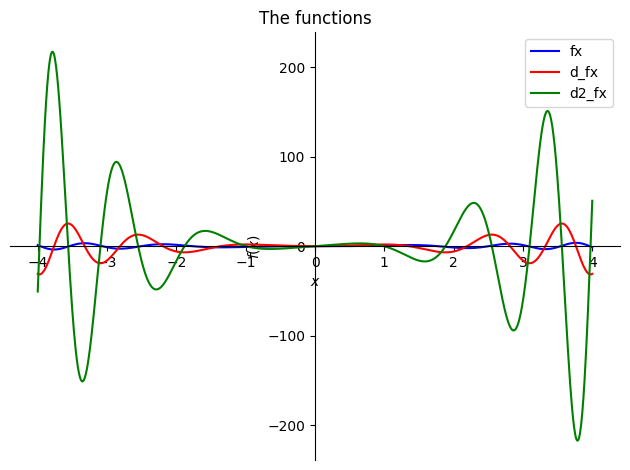

In [ ]:
x = sym.symbols('x')
fx = x*sym.sin(x**2)
d_fx = sym.diff(fx,x)
d2_fx = sym.diff(d_fx,x)

#plotting functions
p = symplot(fx,(x,-4,4),label = 'fx',show = False,line_color = 'blue')
p.extend(symplot(d_fx,(x,-4,4),label = 'd_fx',show = False,line_color = 'red'))
p.extend(symplot(d2_fx,(x,-4,4),label = 'd2_fx',show = False,line_color = 'green'))
p.legend = True
p.title = 'First and second order derivatives'
p.show()

## Pytorch and tensor flow have very sophisticated algoirthms that calculate derivatives for us


In [ ]:
## Product rule
x = sym.symbols('x')

#functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

#derivatives
df = sym.diff(fx,x)
dg = sym.diff(gx,x)

#apply the product rule manually
manual = df*gx + dg*fx
y = sym.diff(fx*gx,x)

print("fx :")
display(fx)
print("gx :")
display(gx)
print("manual :")
display(manual)
print("y :")
display(y)

fx :


2*x**2

gx :


-3*x**4 + 4*x**3

manual :


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

y :


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

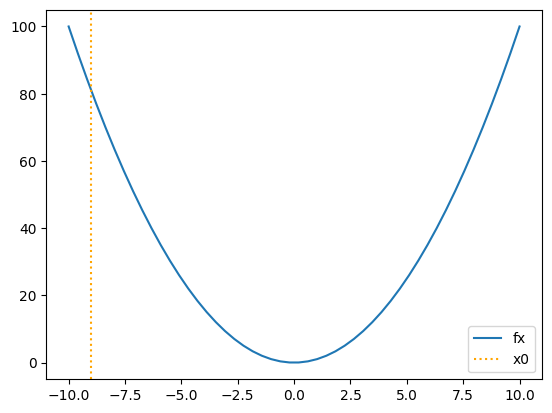

-14.4
-11.52
-9.216
-7.3728
-5.8982399999999995
-4.718591999999999
-3.7748735999999994
-3.0198988799999995
-2.4159191039999994
-1.9327352831999995
-1.5461882265599995
-1.2369505812479997
-0.9895604649983998
-0.7916483719987198
-0.6333186975989759
-0.5066549580791807
-0.40532396646334456
-0.32425917317067565
-0.2594073385365405
-0.2075258708292324
-0.1037629354146162
0.010766746765857814


In [25]:
## Gradient descent (high level)
#step 1 - initial solution/guess
#step 2 - compute error (mathematically computed as error function)
#step 3 - update/ modify parameters

#Saddle points - how big a problem are they and does a GD algorithm really get stuck in them. Here is a good read (https://bair.berkeley.edu/blog/2017/08/31/saddle-efficiency/)

def fx(x):
  return x**2

def dfx(x):
  return 2*x

x = np.linspace(-10,10,50)
x0 = -9 #initial guess

plt.plot(x,fx(x),label = "fx")
# Add a vertical line at x=0.5
plt.axvline(x=x0, color='orange', linestyle=':',label ="x0")
plt.legend()
plt.show()

x= x0
for i in range(20):
  x = x - dfx(x)*0.1
  print(dfx(x))

print(x)
print(fx(x))


starting point : [-1.51430286]
minima value of x from gradient descent : [0.5]


Text(0, 0.5, 'grad')

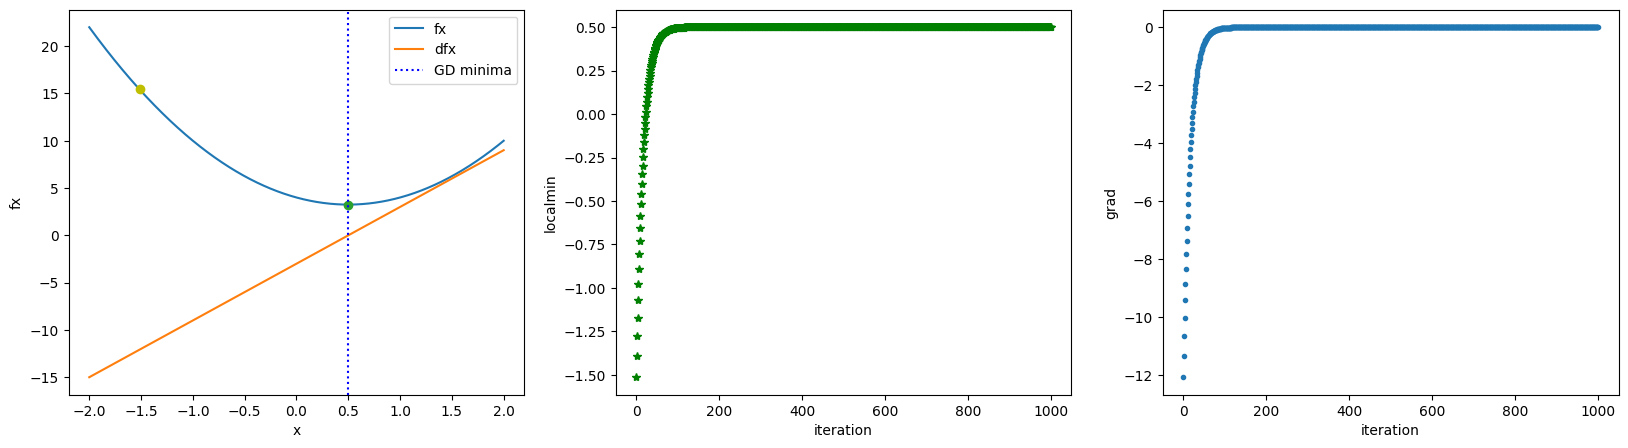

In [174]:
#Gradient descent in 1D
#parameters - learning rate , training epochs
#learning rate : step size
#training epochs : iterations

def fx(x):
  return (3*x**2 - 3*x +4)

def dfx(x):
  return (6*x - 3)


x = np.linspace(-2,2,5000)

#random starting point
localmin = np.random.choice(x,1)

print("starting point :",localmin)

#learning parameters
learning_rate = 0.01
training_epochs = 1000

fig,ax = plt.subplots(1,3,figsize = (20,5))
ax[0].plot(x,fx(x),label="fx")
ax[0].plot(x,dfx(x),label="dfx")
ax[0].plot(0.5,fx(0.5),"o")
ax[0].plot(localmin,fx(localmin),'yo')

#gradient descent
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = dfx(localmin)
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

  localmin = localmin - grad*learning_rate



print("minima value of x from gradient descent :",localmin)

ax[0].axvline(localmin,color ="blue",linestyle = ":",label= "GD minima")
ax[0].set_xlabel("x")
ax[0].set_ylabel("fx")
ax[0].legend()


#for i in range(training_epochs):
ax[1].plot(modelparams[:,0],'g*')
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("localmin") #asymptotically approach true min value of 0.5

ax[2].plot(modelparams[:,1],'.')
ax[2].set_xlabel("iteration")
ax[2].set_ylabel("grad") #asymptotically approach grad of 0

#when learning rate (step size) is small, we need more training epochs(iterations) to get to the true minima
#theorems for paramter tuning - https://www.stat.cmu.edu/~ryantibs/convexopt-F13/scribes/lec6.pdf

Spectral theories are pervasive in mathematics. They essentially decompose a complicated function into simpler components. Examples include Fourier transform (decompose a complicated signal into a sum of sine waves); Eigen decomposition / Singular value decomposition / Matrix decomposition; Laplace transform  etc. Similarly neural networks are composed of a series of linear and non linear transformations.